In [97]:
import numpy as np
import matplotlib.pyplot as plt 
import random                          # crear numeros aleatoriamente
import scipy.io as sio
from sklearn.model_selection import train_test_split


In [98]:
# cargar el archivo .mat
data = sio.loadmat('Tiosulfatosodio.mat')

#Extrayendo matriz de caracteristicas 
Xi = data['x']

#Extrayendo dato esperado (Clases)
Yi = data['y']

#Agregando el bias a las filas de la matriz de caracteristicas (Entradas)
bias = np.full((Xi.shape[0], 1), 1)
Xi = np.hstack((bias, Xi))

#numero de datos
num_datos = Xi.shape[0]

#numero de caracteristicas
caract = Xi.shape[1]-1                  # Se resta el bias 




#Definicion de errores
Err_entr = 10;
Err_pru = 10;

#Datos de entrenamiento y prueba: entrenamiento 90% , prueba 10%
X_ent, X_pru, Y_ent, Y_pru = train_test_split(Xi, Yi, test_size=0.1)

#Obteniendo datos de validacion: Validacion 10% y Entrenamiento 80%
#Se extraen los datos de validación a partir de los de entrenamiento
X_ent, X_val, Y_ent, Y_val = train_test_split(X_ent, Y_ent, test_size=0.1, random_state=42)

#Obteniendo datos de entrenamiento y prueba
D_entre  =  len(X_ent)       # datos de entrenamiento   (verificar la cantidad de dtos para hacer la particion)
D_prueba =  len(X_pru)       #Datos de validacion 
D_val    =  len(X_val)

print(D_entre)

324


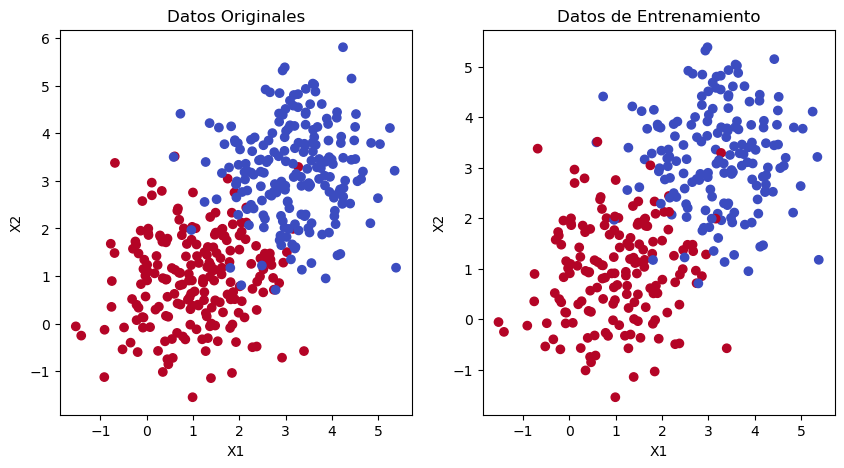

In [99]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la segunda gráfica en el segundo subplot
ax1.scatter(Xi[:, 1], Xi[:, 2], c=Yi, cmap=plt.cm.coolwarm)
ax1.set_title('Datos Originales')
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")

# Graficar la primera gráfica en el primer subplot
ax2.scatter(X_ent[:, 1], X_ent[:, 2], c=Y_ent, cmap=plt.cm.coolwarm)
ax2.set_title('Datos de Entrenamiento')
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")


# Mostrar la figura
plt.show()


In [100]:
#Definicion de los pesos e inicialización 
Wk = []  
for i in range(Xi.shape[1]):                      # ciclo para agregar los numeros aleatorios con los que se inicializaran los pesos
    Wk.append(random.uniform(0,1))                # vector de pesos extendido
print(Wk)


[0.4556694182744708, 0.6373526037062419, 0.7173555104531119]


In [101]:

def error_entrenamiento(x,y,w,n) -> float:
    suma = 0
    vec_Ent  = []
    for i in range (n):
        g = np.dot(np.transpose(w), x[i])

        if g < 0:                # se establece un umbral para poder hacer clasificacion con el algoritmo LMS
            g = -1
        else:
            g = 1

        if g != y[i]:                   # Condicion de Error
            suma = suma + 1          # contador de errores

    error_pct = 100.0 * suma / n
    
    return error_pct

In [102]:

def error_prueba(x,y,w,n) -> float:
    suma = 0
    vec_Pru  = []
   
    for i in range (n):
        g = np.dot(np.transpose(w), x[i])

        if g < 0:                # se establece un umbral para poder hacer clasificacion con el algoritmo LMS
            g = -1
        else:
            g = 1

        if g != y[i]:                   # Condicion de Error
            suma = suma + 1          # contador de errores

    error_pct = 100.0 * suma / n
    
    return error_pct

In [103]:
e = 0
error_ent = []
u=0.1
suma=0
iteraciones = 0
Emin = 20
Eent =  0
print("Wo: ", Wk )

u = 0.1
gamma = 1.05
beta =  1.04
alpha = 0.7

V_errorEnt = []
V_errorPru = []


while( (iteraciones<2000)):

    ################## Error de entrenamiento  ###########################
    
    i = np.random.randint(0,D_entre)
    print("iteraciones =",iteraciones,"\n")
    Y = Y_ent[i][0]
    g = np.dot(np.transpose(Wk),X_ent[i]) #Funcion interna de la neurona. matmul permite multiplicar dos matrices
    print("g: ", g)
    e = (g - Y)  #Error entre la salida dada y la salida esperada 
    print("error:",e)
    
    error_ent.append(e)
    
    ########################################################################
   
    if( (error_ent[iteraciones]/error_ent[iteraciones-1])>beta):
        u = u*alpha
    elif(error_ent[iteraciones]<error_ent[iteraciones-1]):
        u = u*gamma

    print("Peso Wk: ", Wk , "\n")
    Eent  = error_entrenamiento(X_ent,Y_ent,Wk,D_entre)
    V_errorEnt.append(Eent) 
    print("Error de entrenamiento: ", Eent )
    Epru  = error_prueba(X_pru,Y_pru,Wk,D_prueba)
    V_errorPru.append(Epru)
    print("Error de Prueba: ",  Epru )
    
    
    Wk = Wk - e*u*X_ent[i]    #np.dot(value,Xi[i]) #Encuentro los nuevos valores de los pesos utilziando np.dot para multiplicar const * matriz
    
    iteraciones = iteraciones + 1;


Wo:  [0.4556694182744708, 0.6373526037062419, 0.7173555104531119]
iteraciones = 0 

g:  4.806303189366904
error: 5.806303189366904
Peso Wk:  [0.4556694182744708, 0.6373526037062419, 0.7173555104531119] 

Error de entrenamiento:  53.08641975308642
Error de Prueba:  50.0
iteraciones = 1 

g:  -4.11686950963581
error: -5.11686950963581
Peso Wk:  [-0.1249609  -1.39610069 -0.99739137] 

Error de entrenamiento:  45.06172839506173
Error de Prueba:  50.0
iteraciones = 2 

g:  -0.3625236244826915
error: -1.3625236244826915
Peso Wk:  [ 0.4123104  -0.59398681  0.03019541] 

Error de entrenamiento:  29.938271604938272
Error de Prueba:  37.5
iteraciones = 3 

g:  0.007637014686847611
error: -0.9923629853131524
Peso Wk:  [ 0.55537538 -0.41157299 -0.05260555] 

Error de entrenamiento:  20.987654320987655
Error de Prueba:  25.0
iteraciones = 4 

g:  0.9795372585772237
error: -0.020462741422776265
Peso Wk:  [ 0.65957349 -0.28437055  0.03712294] 

Error de entrenamiento:  20.061728395061728
Error de Pru

Error de entrenamiento:  11.11111111111111
Error de Prueba:  10.0
iteraciones = 58 

g:  -0.015624337304262666
error: -1.0156243373042626
Peso Wk:  [ 0.91688421 -0.43843094 -0.04289744] 

Error de entrenamiento:  10.802469135802468
Error de Prueba:  10.0
iteraciones = 59 

g:  -1.1718509284513046
error: -0.17185092845130456
Peso Wk:  [ 0.93486759 -0.40040903 -0.040574  ] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 60 

g:  0.8369483720049768
error: -0.16305162799502315
Peso Wk:  [ 0.93791051 -0.38521192 -0.03255139] 

Error de entrenamiento:  12.654320987654321
Error de Prueba:  15.0
iteraciones = 61 

g:  0.23861772599505865
error: -0.7613822740049414
Peso Wk:  [ 0.94079762 -0.38471285 -0.02950264] 

Error de entrenamiento:  12.654320987654321
Error de Prueba:  15.0
iteraciones = 62 

g:  1.0399394979317287
error: 0.039939497931728685
Peso Wk:  [ 0.95023473 -0.36882119 -0.0121204 ] 

Error de entrenamiento:  14.506172839506172
Error de Prueba:  1

Error de entrenamiento:  10.802469135802468
Error de Prueba:  15.0
iteraciones = 131 

g:  1.10339038375735
error: 0.10339038375734999
Peso Wk:  [ 0.95010186 -0.39895881 -0.03771762] 

Error de entrenamiento:  10.802469135802468
Error de Prueba:  15.0
iteraciones = 132 

g:  -0.7608263195527907
error: 0.23917368044720932
Peso Wk:  [ 0.95006941 -0.39894757 -0.03770461] 

Error de entrenamiento:  10.802469135802468
Error de Prueba:  15.0
iteraciones = 133 

g:  1.523134648383807
error: 0.5231346483838071
Peso Wk:  [ 0.95001687 -0.39916113 -0.03782924] 

Error de entrenamiento:  11.11111111111111
Error de Prueba:  15.0
iteraciones = 134 

g:  0.8599069706753861
error: -0.14009302932461387
Peso Wk:  [ 0.94993642 -0.39904755 -0.03780886] 

Error de entrenamiento:  11.11111111111111
Error de Prueba:  15.0
iteraciones = 135 

g:  0.04419785403335158
error: 1.0441978540333516
Peso Wk:  [ 0.94995904 -0.39904673 -0.03776369] 

Error de entrenamiento:  11.11111111111111
Error de Prueba:  15.0
ite

Error de Prueba:  12.5
iteraciones = 209 

g:  -0.5424555838640017
error: 0.4575444161359983
Peso Wk:  [ 0.94955705 -0.40031299 -0.04042051] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 210 

g:  0.3292170861827745
error: -0.6707829138172254
Peso Wk:  [ 0.94955442 -0.4003216  -0.04043249] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 211 

g:  -0.01858542072805673
error: 0.9814145792719433
Peso Wk:  [ 0.94955847 -0.40031569 -0.04042882] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 212 

g:  0.04883738357721604
error: 1.048837383577216
Peso Wk:  [ 0.94955254 -0.40032879 -0.04044109] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 213 

g:  0.02932634316523891
error: 1.0293263431652389
Peso Wk:  [ 0.94954811 -0.40033742 -0.04045435] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 214 

g:  0.8293196198336173

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 350 

g:  0.3585297354589744
error: -0.6414702645410256
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 351 

g:  0.21282943669071527
error: -0.7871705633092847
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 352 

g:  -0.04178937464231643
error: -1.0417893746423164
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 353 

g:  -0.010307782780121635
error: -1.0103077827801217
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 354 

g:  -1.050213206505035
error: -0.05021320650503491
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueb

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 447 

g:  -0.4026305757303123
error: 0.5973694242696876
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 448 

g:  -0.5102233634158821
error: 0.48977663658411785
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 449 

g:  -0.9602590942938694
error: 0.03974090570613065
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 450 

g:  0.8591222015070497
error: -0.14087779849295035
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 451 

g:  -0.7078880416129423
error: 0.2921119583870577
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 587 

g:  -0.5266087565101585
error: 0.4733912434898415
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 588 

g:  -0.3000112558525533
error: 0.6999887441474467
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 589 

g:  -0.0737940308537256
error: 0.9262059691462744
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 590 

g:  0.7397164886588895
error: -0.2602835113411105
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 591 

g:  0.22140285879105043
error: -0.7785971412089496
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 781 

g:  0.20183883113026954
error: -0.7981611688697304
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 782 

g:  -0.40283432154699733
error: 0.5971656784530026
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 783 

g:  0.43713883283336896
error: -0.562861167166631
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 784 

g:  0.10383832982458929
error: 1.1038383298245893
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 785 

g:  -0.9946521081235365
error: 0.005347891876463451
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba: 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 909 

g:  0.4258082256264573
error: -0.5741917743735427
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 910 

g:  0.28444977161799817
error: -0.7155502283820019
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 911 

g:  0.4398661797956623
error: -0.5601338202043378
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 912 

g:  0.20058387548684722
error: -0.7994161245131528
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 913 

g:  0.9595586097281981
error: -0.040441390271801936
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba: 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1017 

g:  0.8292626236192576
error: -0.17073737638074238
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1018 

g:  -0.054278484225074766
error: 0.9457215157749252
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1019 

g:  -0.40283432154699733
error: 0.5971656784530026
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1020 

g:  0.7050586681825459
error: -0.2949413318174541
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1021 

g:  0.8006743409574542
error: -0.19932565904254584
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Pr

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1136 

g:  -0.5079465248876369
error: 0.4920534751123631
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1137 

g:  0.3769653062402285
error: -0.6230346937597715
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1138 

g:  -0.5366499145282915
error: 0.46335008547170853
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1139 

g:  1.1044516233829063
error: 0.10445162338290626
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1140 

g:  -0.7740315818412393
error: 0.22596841815876068
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueb

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1267 

g:  0.17878600603703546
error: 1.1787860060370354
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1268 

g:  0.17878600603703546
error: 1.1787860060370354
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1269 

g:  -0.7078880416596786
error: 0.29211195834032144
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1270 

g:  0.25887316231013824
error: -0.7411268376898618
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1271 

g:  0.47849589217726335
error: 1.4784958921772633
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueb

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1372 

g:  -0.17908171996444194
error: -1.1790817199644419
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1373 

g:  0.33661617251681514
error: -0.6633838274831849
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1374 

g:  -0.17908171996444194
error: -1.1790817199644419
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1375 

g:  -0.07096123244602805
error: -1.070961232446028
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1376 

g:  0.3585297365421592
error: -0.6414702634578409
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de P

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1494 

g:  -0.39646113334930433
error: -1.3964611333493044
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1495 

g:  -0.4436091161328038
error: 0.5563908838671963
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1496 

g:  0.5878151435041227
error: -0.4121848564958773
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1497 

g:  0.08461589724727403
error: -0.915384102752726
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1498 

g:  0.04835407922059319
error: 1.0483540792205932
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueb

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1622 

g:  0.8610148938977363
error: -0.13898510610226367
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1623 

g:  0.12368455266637887
error: 1.1236845526663788
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1624 

g:  0.2513910565178003
error: -0.7486089434821996
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1625 

g:  0.04436560809721539
error: -0.9556343919027847
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1626 

g:  0.5398991661658985
error: -0.4601008338341015
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueb

Error de Prueba:  12.5
iteraciones = 1730 

g:  -0.17693526665511258
error: 0.8230647333448874
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1731 

g:  -0.2865961076964578
error: 0.7134038923035422
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1732 

g:  -1.0206705290283982
error: -0.020670529028398166
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1733 

g:  -0.10169918559897492
error: 0.898300814401025
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1734 

g:  -0.8912386318354828
error: 0.1087613681645172
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1735 

g:  0.930624

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1836 

g:  -0.9125047433234788
error: 0.08749525667652125
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1837 

g:  0.12538330702825393
error: -0.874616692971746
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1838 

g:  0.06544635075867355
error: 1.0654463507586736
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1839 

g:  0.5472257188285957
error: -0.4527742811714043
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1840 

g:  -0.6556049897853657
error: 0.34439501021463426
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueb

Error de Prueba:  12.5
iteraciones = 1928 

g:  0.2343617601429116
error: 1.2343617601429115
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1929 

g:  0.42334000747694894
error: -0.5766599925230511
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1930 

g:  0.7453165000185545
error: -0.25468349998144546
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1931 

g:  -0.8374852656377879
error: 0.1625147343622121
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1932 

g:  -0.49559626639309917
error: -1.495596266393099
Peso Wk:  [ 0.94952806 -0.40040639 -0.04054398] 

Error de entrenamiento:  11.419753086419753
Error de Prueba:  12.5
iteraciones = 1933 

g:  -0.5366499

In [104]:
##################  Probando datos de Validacion  ###########
error_val = 0
for i in range (D_val):
    Y = Y_val[i][0]
    g = np.dot(np.transpose(Wk),X_val[i])
    
    if g < 0:                # se establece un umbral para poder hacer clasificacion con el algoritmo LMS
        g = -1
    else:
        g = 1
    
    if(g != Y):
        error_val = error_val + 1

err_porc = 100*error_val/D_val
print("Error total de validacion: ", err_porc)

Error total de validacion:  13.88888888888889


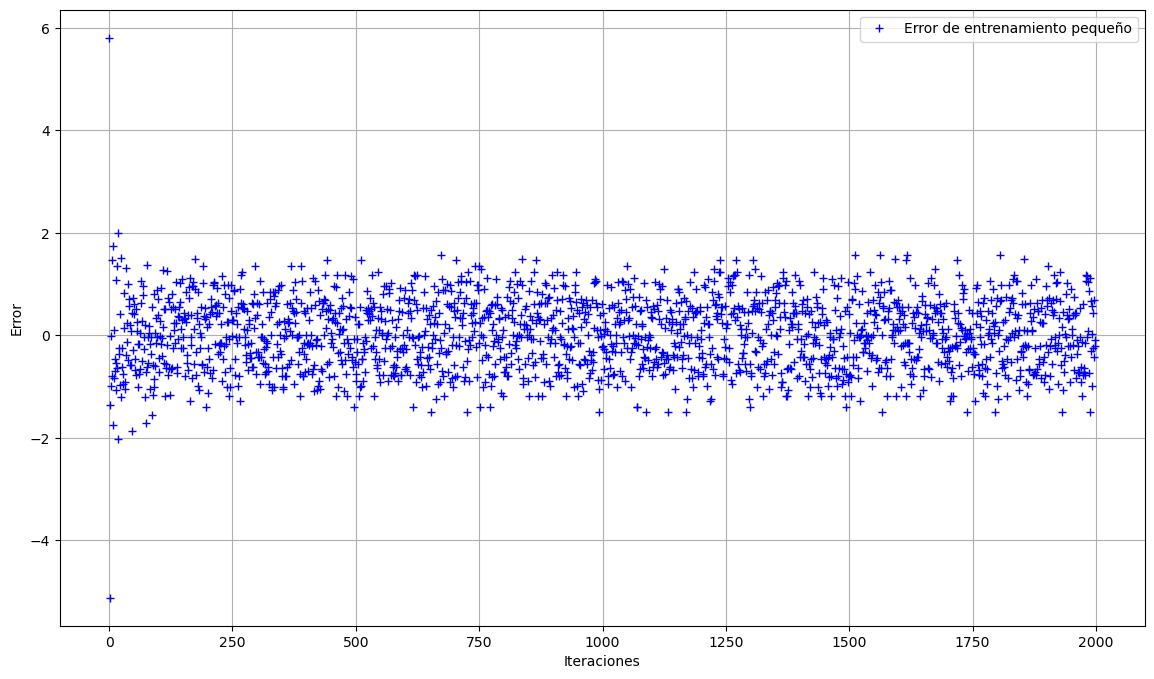

In [105]:
plt.figure(figsize=(14,8))
plt.plot(error_ent, 'b+', label = "Error de entrenamiento pequeño")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.grid()

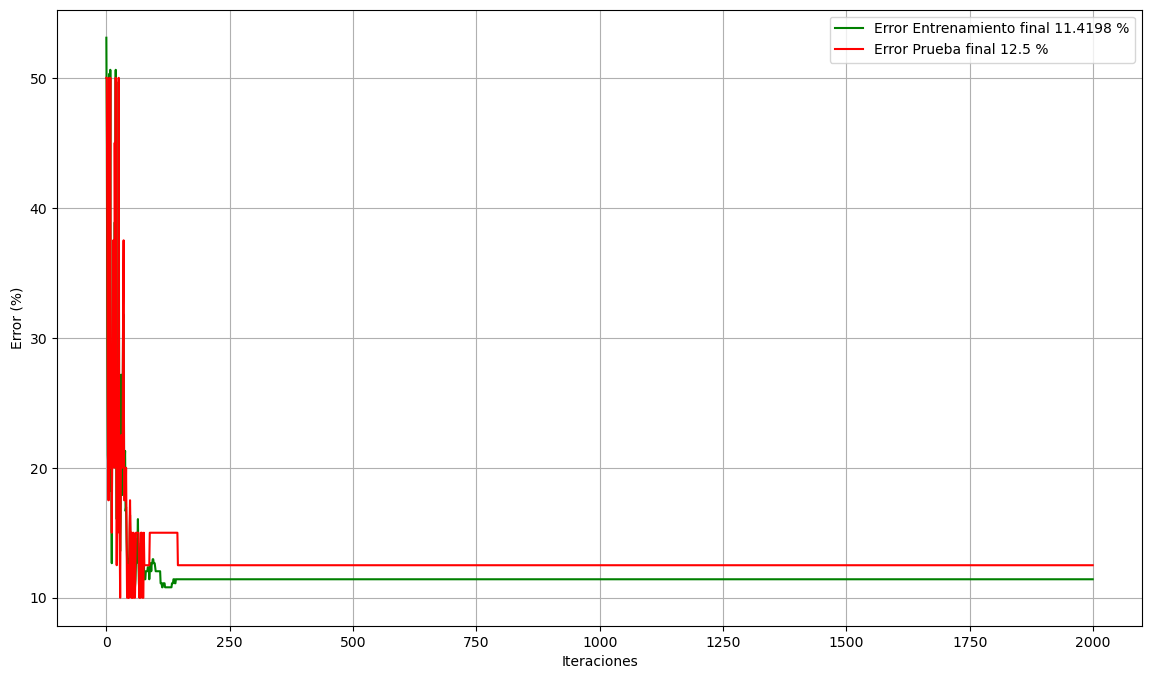

In [106]:
plt.figure(figsize=(14,8))
plt.plot(V_errorEnt , 'g' ,label = f"Error Entrenamiento final {round(Eent,4)} %")
plt.plot(V_errorPru, 'r' , label = f"Error Prueba final {round(Epru,4)} %")
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Error (%)')
plt.grid()